# Loan Defaulter Prediction

Column name | Description
------------|------------
loan_amnt   | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term        | The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate    | Interest Rate on the loan
installment | The monthly payment owed by the borrower if the loan originates.
grade       | LC assigned loan grade
sub_grade   | LC assigned loan subgrade
emp_title   | The job title supplied by the Borrower when applying for the loan
emp_length  | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc | The self-reported annual income provided by the borrower during registration.
verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d    | The month which the loan was funded
loan_status | Current status of the loan
purpose    | A category provided by the borrower for the loan request
title | The loan title provided by the borrower
zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application
addr_state | The state provided by the borrower in the loan application
dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line | The month the borrower's earliest reported credit line was opened
open_acc | The number of open credit lines in the borrower's credit file.
pub_rec | Number of derogatory public records
revol_bal | Total credit revolving balance
revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc | The total number of credit lines currently in the borrower's credit file
initial_list_status | The initial listing status of the loan. Possible values are – W, F
application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc | Number of mortgage accounts.
pub_rec_bankruptcies | Number of public record bankruptcies

In [1]:
# download datasets from github and unzip (google colab)
!wget https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv

--2023-10-16 15:43:44--  https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100353395 (96M) [text/plain]
Saving to: ‘lending_club_loan_two.csv’

lending_club_loan_t 100%[===================>]  95.70M  94.2MB/s    in 1.0s    

2023-10-16 15:43:52 (94.2 MB/s) - ‘lending_club_loan_two.csv’ saved [100353395/100353395]



In [2]:
# Read the data
import pandas as pd
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Data Exploration

In [3]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Imbalance because dataset has more fully paid status than charged off status

In [4]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [5]:
# Select only the related features here.

selected_features = ['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
                     'verification_status', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
                     'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
df = df[selected_features]

## Data Cleaning

Spot by using isnull and sum method. There are 4 incomplete columns: emp_length revol_util, mort_acc, and pub_rec_bankruptcies. I handle each column by replacing with mode and median value.
* emp_length - fill with mode value because it's categorical data.
* revol_util - fill with mean value because it's numerical data.
* mort_acc - fill with mean value
* pub_rec_bankruptcies - fill with mean value

In [6]:
#find missing values

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [7]:
#find mean value of numerical data ('revol_util', 'mort_acc', 'pub_rec_bankruptcies')

df[['revol_util', 'mort_acc', 'pub_rec_bankruptcies']].mean()

revol_util              53.791749
mort_acc                 1.813991
pub_rec_bankruptcies     0.121648
dtype: float64

In [8]:
#find mode of categorical data (emp_length)

df['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [9]:
#fill missing emp_length with mode (10+ years)

df['emp_length'].fillna('10+ years', inplace=True)

In [10]:
#fill missing pub_rec_bankruptcies with mean as int because other data is int number

mean_pub = int(df['pub_rec_bankruptcies'].mean())
df['pub_rec_bankruptcies'].fillna(mean_pub, inplace=True)

In [11]:
#fill missing mort_acc with mean as int because other data is int number

mean_mort_acc = int(df['mort_acc'].mean())
df['mort_acc'].fillna(mean_mort_acc, inplace=True)

In [12]:
#fill missing revol_util with mean as int because other data is int number

mean_revol_util = int(df['revol_util'].mean())
df['revol_util'].fillna(mean_revol_util, inplace=True)

In [13]:
#recheck missing value

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

## Data Preparation

In [14]:
#convert term
term_mapping = {' 36 months':36, ' 60 months':60}
df['term'] = df['term'].map(term_mapping)

In [15]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#sub_grade
sg_list = 'A1 A2 A3 A4 A5 B1 B2 B3 B4 B5 C1 C2 C3 C4 C5 D1 D2 D3 D4 D5 E1 E2 E3 E4 E5 F1 F2 F3 F4 F5 G1 G2 G3 G4 G5'.split()
sg_mapping = dict()
for i in range(len(sg_list)):
  sg_mapping[sg_list[i]] = i

df['sub_grade'] = df['sub_grade'].map(sg_mapping)

#emp_length
emp_len_list = '< 1 year, 1 year, 2 years, 3 years, 4 years, 5 years, 6 years, 7 years, 8 years, 9 years, 10+ years'.split(', ')
emp_len_mapping = dict()
for i in range(len(emp_len_list)):
  emp_len_mapping[emp_len_list[i]] = i

df['emp_length'] = df['emp_length'].map(emp_len_mapping)

#verification_status
ver_mapping = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
df['verification_status'] = df['verification_status'].map(ver_mapping)

#loan_status
loan_mapping = {'Charged Off': 0, 'Fully Paid': 1}
df['loan_status'] = df['loan_status'].map(loan_mapping)

In [16]:
#onehot encoding

#home_ownership
one_hot_home = pd.get_dummies(df['home_ownership'])
df = pd.concat([df, one_hot_home], axis=1)
df = df.drop('home_ownership', axis=1)

## Split data

In [17]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.1,random_state=42)
train,train_val = train_test_split(train,test_size=0.111,random_state=42)

In [18]:
X_train = train.drop(['loan_status'],axis= 1).values
y_train = train['loan_status']

X_train_val = train_val.drop(['loan_status'],axis= 1).values
y_train_val = train_val['loan_status']

X_test = test.drop(['loan_status'],axis= 1).values
y_test = test['loan_status']

## Train, evaluate, and fine-tune models

Use Recall Metric

*   High recall metric has less false-negative which we need to focus because this group is the borrowers we shouldn't approve the loan to.
* Thus we need to model which has good recall to figure out bad borrowers as many as possible.

In [19]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_val_scaled = scaler.transform(X_train_val)

Baseline

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

# Define the logistic regression model
logreg = LogisticRegression()

# Define the grid of hyperparameters to search
param_grid = {
    'penalty': ['l2'],
    'C': [1.0, 0.1, 0.01],
    'solver': ['lbfgs',  'liblinear']
}

# Set the scoring metric to recall
scoring = {'recall': make_scorer(recall_score)}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring=scoring, refit='recall')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Recall: ", grid_search.best_score_)

# Evaluate the model with the best hyperparameters on the test set
best_logreg = grid_search.best_estimator_
y_test_pred_base = best_logreg.predict(X_test_scaled)
y_test_pred_prob_base = best_logreg.predict_proba(X_test_scaled)
precision = precision_score(y_test, y_test_pred_base)
print("Test Precision:", precision)
recall = recall_score(y_test, y_test_pred_base)
print("Test Recall: ", recall)

Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Recall:  0.98199718099681
Test Precision: 0.8106157333819736
Test Recall:  0.9816661407384033


M1

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score

# C reate a Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 1000],
    'max_features': ['sqrt']
}

# Define the scoring metrics (recall and precision)
scoring = make_scorer(recall_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scoring,
    cv=2
)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Evaluate the model with the best hyperparameters on the test set
best_rf = grid_search.best_estimator_
y_test_pred_m1 = best_rf.predict(X_test_scaled)
y_test_pred_prob_m1 = best_rf.predict_proba(X_test_scaled)

# Print the best model and its performance
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Model:", best_rf)
print("Best Recall:", grid_search.best_score_)

precision = precision_score(y_test, y_test_pred_m1)
print("Test Precision:", precision)
recall = recall_score(y_test, y_test_pred_m1)
print("Test Recall: ", recall)

Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 1000}
Best Model: RandomForestClassifier(n_estimators=1000)
Best Recall: 0.9845634081971482
Test Precision: 0.8098686601256294
Test Recall:  0.9845692647522878


M2

In [23]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 7.4 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python -m pip install --upgrade pip


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score
from xgboost import XGBClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3],
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=2)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Recall: ", grid_search.best_score_)

# Get the best model
best_xgb_m2 = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred_m2 = best_xgb_m2.predict(X_test_scaled)
y_test_pred_prob_m2 = best_xgb_m2.predict_proba(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_test_pred_m2)
print("Test Precision:", precision)

# Calculate recall score on the test set
recall = recall_score(y_test, y_test_pred_m2)
print("Test Recall: ", recall)

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages

Best Parameters:  {'max_depth': 3, 'n_estimators': 100}
Best Recall:  0.9847556769281169
Test Precision: 0.8106088129963149
Test Recall:  0.9856737141053961


M3

In [25]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 10.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python -m pip install --upgrade pip


In [26]:
#over sampling data using SMOTE

from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE resampler
smote = SMOTE()

# Apply SMOTE to upsample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score
from xgboost import XGBClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3],
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=2)
grid_search.fit(X_train_resampled,y_train_resampled)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Recall: ", grid_search.best_score_)

# Get the best model
best_xgb_m3 = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred_m3 = best_xgb_m3.predict(X_test_scaled)
y_test_pred_prob_m3 = best_xgb_m3.predict_proba(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_test_pred_m3)
print("Test Precision:", precision)

# Calculate recall score on the test set
recall = recall_score(y_test, y_test_pred_m3)
print("Test Recall: ", recall)

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages

Best Parameters:  {'max_depth': 3, 'n_estimators': 200}
Best Recall:  0.9289542841563276
Test Precision: 0.8200520344392886
Test Recall:  0.9647838434837488


M4

In [28]:
#create new feature: percent of installment compare with income
df['installment_percent'] = (df['installment'] / (df['annual_inc'] / 12)) * 100

#replace inf value with mean
import numpy as np

df['installment_percent'].replace([np.inf, -np.inf], np.nan, inplace=True)
mean_percent = df['installment_percent'].mean()
df['installment_percent'].fillna(mean_percent, inplace=True)

In [29]:
#split data
train,test = train_test_split(df,test_size=0.1,random_state=42)
train,train_val = train_test_split(train,test_size=0.111,random_state=42)

X_train = train.drop(['loan_status'],axis= 1).values
y_train = train['loan_status']

X_train_val = train_val.drop(['loan_status'],axis= 1).values
y_train_val = train_val['loan_status']

X_test = test.drop(['loan_status'],axis= 1).values
y_test = test['loan_status']

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_val_scaled = scaler.transform(X_train_val)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score
from xgboost import XGBClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3],
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=2)
grid_search.fit(X_train_scaled,y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Recall: ", grid_search.best_score_)

# Get the best model
best_xgb_m4 = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred_m4 = best_xgb_m4.predict(X_test_scaled)
y_test_pred_prob_m4 = best_xgb_m4.predict_proba(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_test_pred_m4)
print("Test Precision:", precision)

# Calculate recall score on the test set
recall = recall_score(y_test, y_test_pred_m4)
print("Test Recall: ", recall)

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Best Parameters:  {'max_depth': 3, 'n_estimators': 100}
Best Recall:  0.9839238153873123
Test Precision: 0.8108220387391598
Test Recall:  0.9854212685389713


### Plot ROC curves and precision-recall curves to compare models (Baseline, M1, M2, M3, M4).

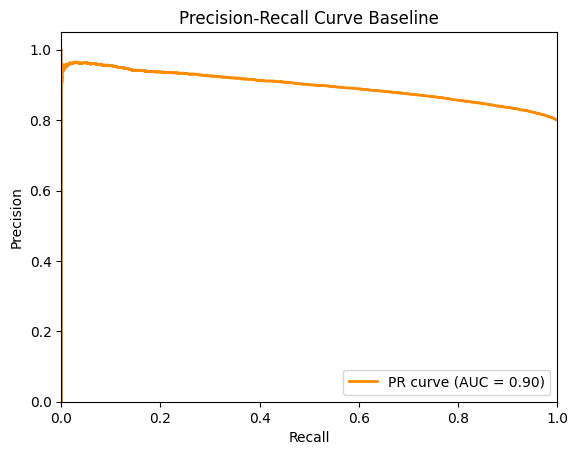

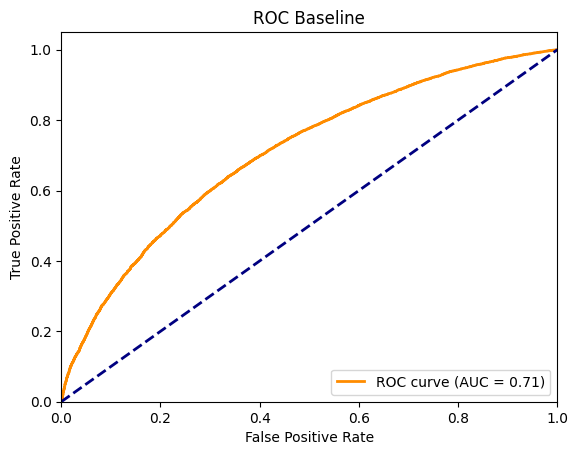

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_base[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

auc_score = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % auc_score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Baseline')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_base[:,1]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Baseline')
plt.legend(loc="lower right")
plt.show()

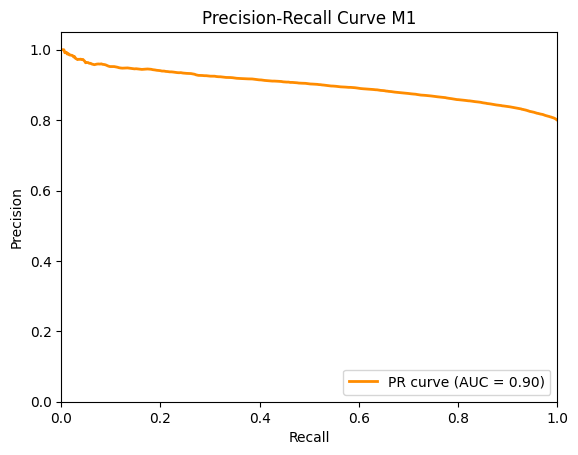

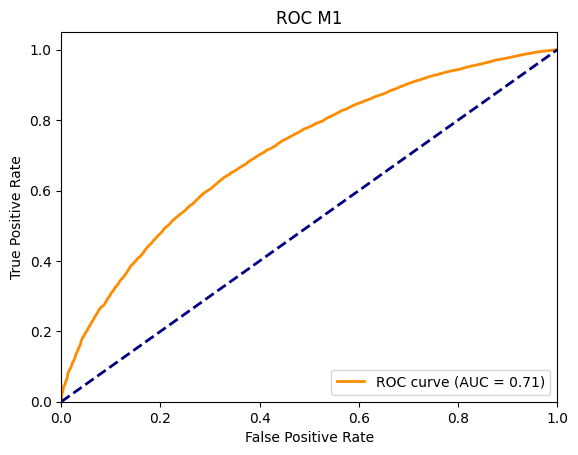

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m1[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

auc_score = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % auc_score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve M1')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m1[:,1]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC M1')
plt.legend(loc="lower right")
plt.show()

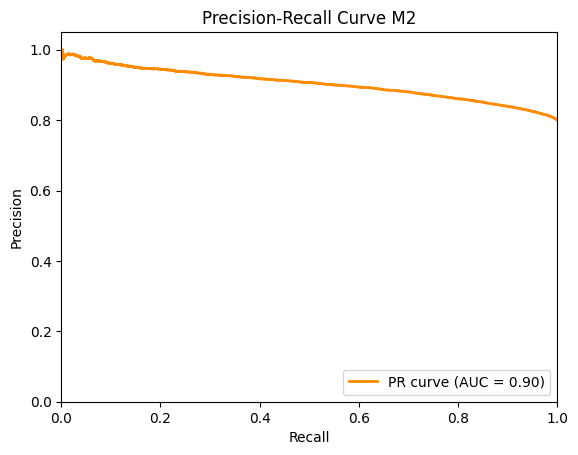

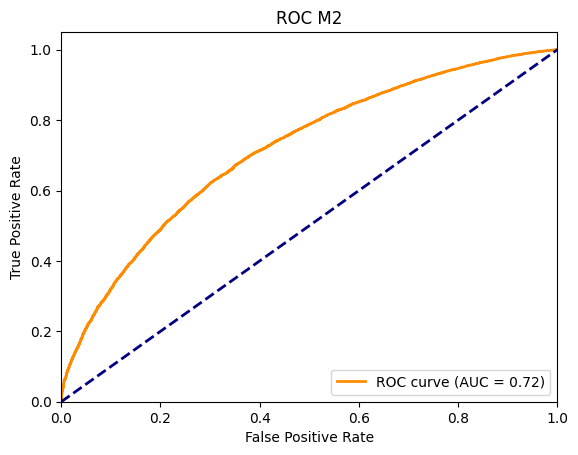

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m2[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

auc_score = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % auc_score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve M2')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m2[:,1]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC M2')
plt.legend(loc="lower right")
plt.show()

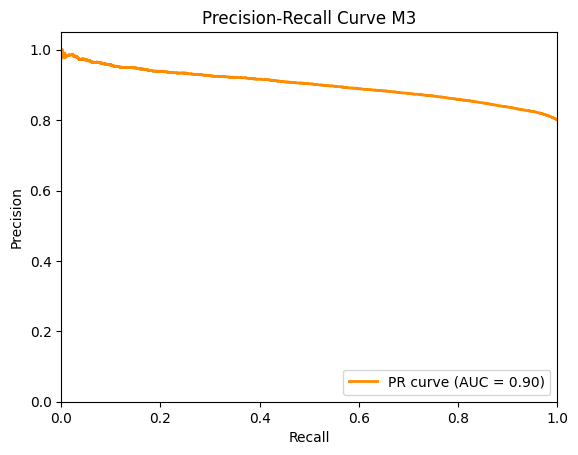

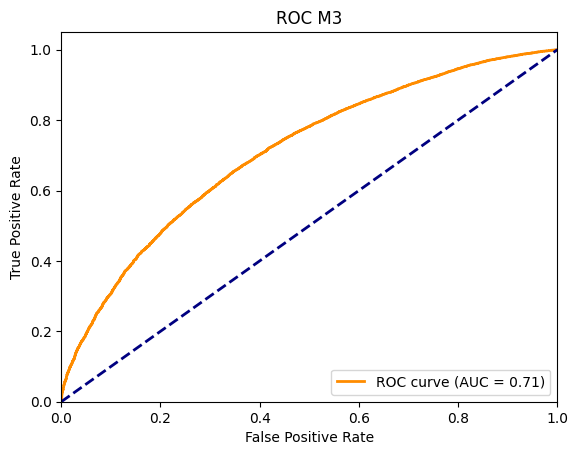

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m3[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

auc_score = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % auc_score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve M3')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m3[:,1]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC M3')
plt.legend(loc="lower right")
plt.show()

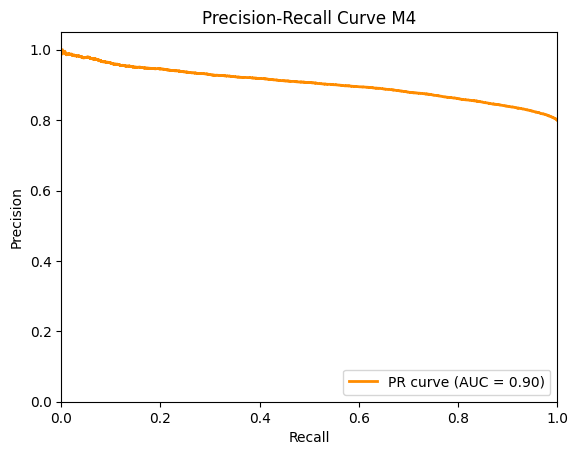

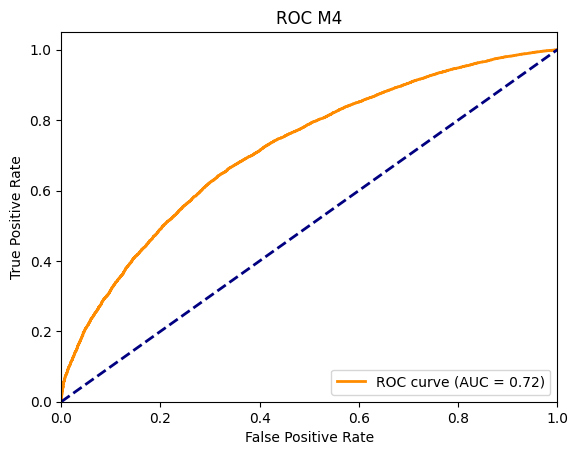

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m4[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

auc_score = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % auc_score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve M4')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc

y_true = y_test
y_scores = y_test_pred_prob_m4[:,1]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC M4')
plt.legend(loc="lower right")
plt.show()